In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
'''
   This notebook is the implementation
   of Prophet model for time series analysis
   of the sales data
'''

# Ownership
__author__ = ["M. Haseeb Hassan]
__copyright__ = ["Copyrights @ hacceebhassan"]
__license__ = "MIT"
__version__ = "1.0.1"
__maintainer__ = "M. Haseeb Hassan"
__email__ = "hacceebhassan@gmail.com"
__status__ = "Development"

Mounted at /content/drive/


In [2]:
# Provide path to the folder containing files
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/time_series_analysis')

In [35]:
### ----- Importing Libraries ----- ###
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.ensemble import RandomForestRegressor

In [6]:
# Dataset
data = pd.read_excel('data/processed_sales_data.xlsx', parse_dates=['date'])
data.head()

company       date      sales
0  Beam Global  2020-07-11  76.377785
1  Beam Global  2020-07-18  81.547145
2  Beam Global  2020-07-25  81.607416
3  Beam Global  2020-08-01  81.607416
4  Beam Global  2020-08-08  81.607416

### **Prophet Model**

In [27]:
df = data.rename(columns={'date':'ds','sales':'y'})
df_1 = df[df.company=='Beam Global ']
df_1

company         ds          y
0   Beam Global  2020-07-11  76.377785
1   Beam Global  2020-07-18  81.547145
2   Beam Global  2020-07-25  81.607416
3   Beam Global  2020-08-01  81.607416
4   Beam Global  2020-08-08  81.607416
5   Beam Global  2020-08-15  81.607416
6   Beam Global  2020-08-22  81.607416
7   Beam Global  2020-08-29  67.369653
8   Beam Global  2020-09-05  45.000000
9   Beam Global  2020-09-12  45.000000
10  Beam Global  2020-09-19  45.000000
11  Beam Global  2020-09-26  45.000000
12  Beam Global  2020-10-03  45.000000
13  Beam Global  2020-10-10  45.000000
14  Beam Global  2020-10-17  45.000000
15  Beam Global  2020-10-24  45.000000
16  Beam Global  2020-10-31  45.000000
17  Beam Global  2020-11-07  45.000000
18  Beam Global  2020-11-14  45.000000
19  Beam Global  2020-11-21  45.000000
20  Beam Global  2020-11-28  45.000000
21  Beam Global  2020-12-05  45.000000
22  Beam Global  2020-12-12  45.000000
23  Beam Global  2020-12-19  45.000000
24  Beam Global  2020-12-26  45.000000
25  Beam Global  2021-01-02  45.000000

In [46]:
# Training
model=Prophet(yearly_seasonality=False,
        weekly_seasonality=False,
        daily_seasonality=False, 
        interval_width=0.95, 
        mcmc_samples = 500)
model.add_seasonality(
        name='weekly', 
        period=7.5, 
        fourier_order=5
    )
model.fit(df_1)

INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


In [47]:
# Prediction
forecast=model.make_future_dataframe(freq='W', periods = 4)
forecast=model.predict(forecast)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]

ds       yhat  yhat_lower  yhat_upper
0  2020-07-11  76.574921   50.182384   97.068546
1  2020-07-18  78.621543   59.570244  100.164372
2  2020-07-25  77.663973   54.232740   97.316751
3  2020-08-01  77.316337   54.472736   98.432062
4  2020-08-08  76.503899   55.882933   99.297617
5  2020-08-15  75.347864   53.877564   96.590585
6  2020-08-22  75.074618   54.286532   95.233694
7  2020-08-29  66.952224   44.090336   91.768993
8  2020-09-05  55.666703   35.013235   76.580544
9  2020-09-12  54.744295   32.380284   78.509178
10 2020-09-19  53.869646   33.476908   76.781013
11 2020-09-26  45.762728   22.953546   71.829330
12 2020-10-03  43.619471   21.070855   68.800915
13 2020-10-10  45.767383   23.424506   71.018492
14 2020-10-17  44.249088   21.752036   68.160745
15 2020-10-24  45.420111   25.803400   66.396970
16 2020-10-31  48.476412   28.139722   70.254424
17 2020-11-07  48.640900   27.636800   68.987662
18 2020-11-14  49.541196   28.459906   70.136984
19 2020-11-21  50.108602   28.722113   73.144373
20 2020-11-28  50.435567   28.217388   70.087764
21 2020-12-05  51.633605   28.537404   73.448690
22 2020-12-12  44.943042   24.105686   64.670635
23 2020-12-19  35.016301   12.417350   55.539349
24 2020-12-26  35.384687   14.003333   57.417282
25 2021-01-02  35.698579   10.323008   58.699632
26 2021-01-03  33.167182    9.490949   52.879132
27 2021-01-10  33.535568   10.502235   53.881362
28 2021-01-17  33.849461   11.650486   55.734734
29 2021-01-24  26.814936    0.045915   51.114978

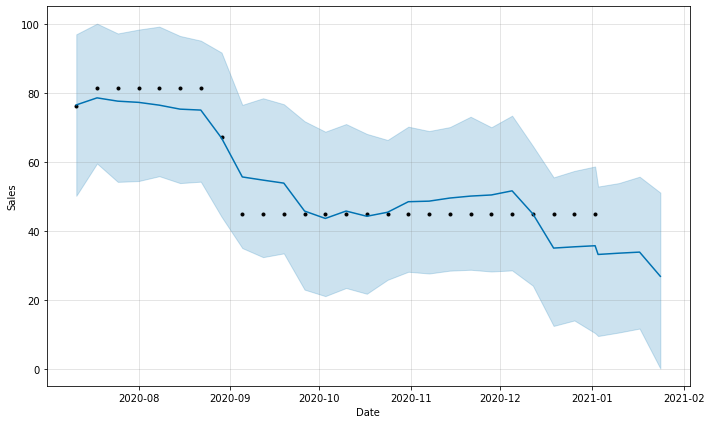

In [48]:
# Plotting
figure=model.plot(forecast,xlabel='Date',ylabel='Sales')